# Explore effect of bucket sizes 

In [325]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import matplotlib.ticker as ticker
import matplotlib as mpl
import sys
from math import *
from scipy.stats import binned_statistic
import inspect
import matplotlib as mpl
import ast
from statistics import mean
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr



sns.set_context("talk")

# Import custom functions
from utils_benchmark import * 
#test()

sns.set_style("white")

evaluation_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/"
outdir = "../../../data/structural_regression/plots/02_benchmarkCPU/"
stats_dir = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/"

# Load dataset to analyze 
# Only retain famsa progressive, MBED and MEDOID
scores_df = pd.read_csv(os.path.join(stats_dir, "03_scores_df.csv"))
metrics = ["tc", "sp"]

In [326]:


df_benchmark_buckets = scores_df[( (scores_df.tree_method.isin(["FAMSA-medoid","MBED"])))& \
           (scores_df.align_method == "FAMSA") \
         ]

# Check effects on dynamic

In [327]:
df_benchmark_buckets_4dyn = scores_df[( (scores_df.tree_method.isin(["FAMSA-medoid","MBED"])))]


In [328]:
df = df_benchmark_buckets_4dyn[(df_benchmark_buckets_4dyn.method == "dynamic") &\
                              (df_benchmark_buckets_4dyn.slave_msa == "famsa_msa") &\
                              (df_benchmark_buckets_4dyn.dynamicX_val == 100000000.0) 
                              ]

dynamic = df[~df.buckets.isnull()]

In [329]:
dynamic_mbed = dynamic[dynamic.tree_method == "MBED"].reset_index(drop=True)
dynamic_medoid = dynamic[dynamic.tree_method == "FAMSA-medoid"].reset_index(drop=True)

dynamic_reduced = dynamic[["name","family","tree_method","size_group","buckets"]]
dynamic_reduced = dynamic_reduced.dropna(subset = ["buckets"])

dynamic_reduced['buckets'] = dynamic_reduced['buckets'].apply(lambda s: list(ast.literal_eval(s)))
dynamic_extended = dynamic_reduced.explode("buckets")
dynamic_extended = dynamic_extended.astype({"buckets": float})

In [330]:
len(dynamic_extended.index)

3047

[Text(0.5, 0, 'family group size'), Text(0, 0.5, 'bucket size')]

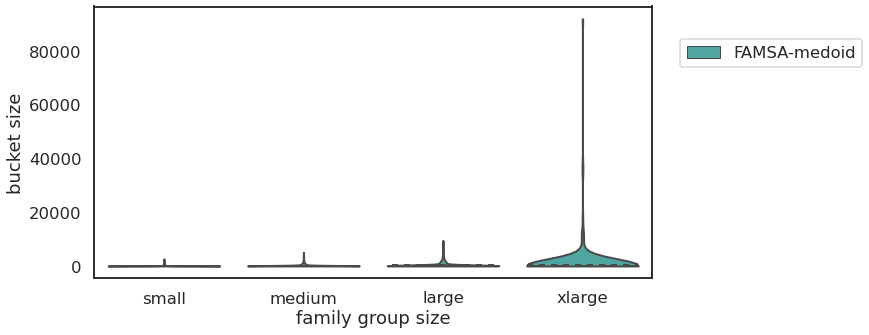

In [331]:
sns.set_context("talk")

plt.figure(figsize=(10,5))
# Draw a nested boxplot to show bills by day and time
ax = sns.violinplot( x="size_group", y="buckets",hue = "tree_method", dodge = False,cut=0, order=[ "small", "medium", "large", "xlarge"], \
            data=dynamic_extended, orient = "v", split=False, inner="quart", linewidth=2, palette={"FAMSA-medoid": "#40B5AD", "MBED": ".85"})
plt.legend(bbox_to_anchor=(1.05, 0.88),  loc = 2, borderaxespad=0.);
ax.set(xlabel="family group size", ylabel = "bucket size")

[Text(0.5, 0, 'total number of buckets')]

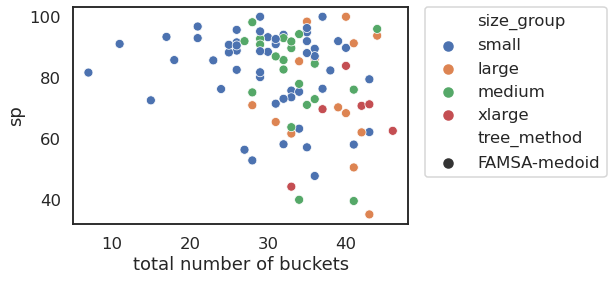

In [332]:
metric = "sp"
ax = sns.scatterplot(data=dynamic, y=metric, x="tot", hue="size_group", style="tree_method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel=metric)
ax.set(xlabel="total number of buckets")

[Text(0.5, 0, 'mean bucket size')]

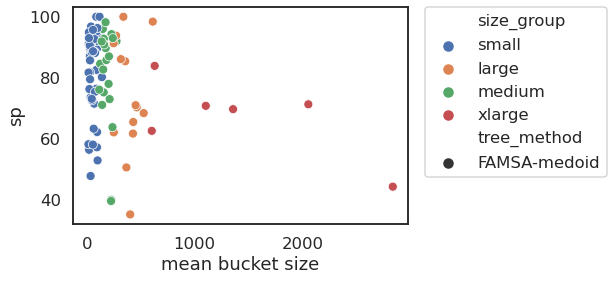

In [333]:
metric = "sp"
ax = sns.scatterplot(data=dynamic, y=metric, x="mean_buckets", hue="size_group", style="tree_method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel=metric)
ax.set(xlabel="mean bucket size")

In [303]:
print(spearmanr(dynamic_mbed.tot, dynamic_mbed.sp))
print(spearmanr(dynamic_mbed.mean_buckets, dynamic_mbed.sp))

SpearmanrResult(correlation=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)


In [304]:
print(spearmanr(dynamic_medoid.tot, dynamic_medoid.sp))
print(spearmanr(dynamic_medoid.mean_buckets, dynamic_medoid.sp))

SpearmanrResult(correlation=-0.21232072416750034, pvalue=0.2006292235605676)
SpearmanrResult(correlation=-0.02615595110482024, pvalue=0.876130355145285)


# Check the bucket size distribution 

In [175]:
# Extract regressive
regressive = df_benchmark_buckets[df_benchmark_buckets.method == "regressive"].reset_index(drop=True)
progressive = df_benchmark_buckets[df_benchmark_buckets.method == "progressive"].reset_index(drop=True)
regressive_mbed = regressive[regressive.tree_method == "MBED"].reset_index(drop=True)
regressive_medoid = regressive[regressive.tree_method == "FAMSA-medoid"].reset_index(drop=True)

In [177]:
regressive_reduced = regressive[["name","family","tree_method","size_group","buckets"]]
regressive_reduced = regressive_reduced.dropna(subset = ["buckets"])

regressive_reduced['buckets'] = regressive_reduced['buckets'].apply(lambda s: list(ast.literal_eval(s)))
regressive_buckets_extended = regressive_reduced.explode("buckets")
regressive_buckets_extended = regressive_buckets_extended.astype({"buckets": float})

[Text(0.5, 0, 'family group size'), Text(0, 0.5, 'bucket size')]

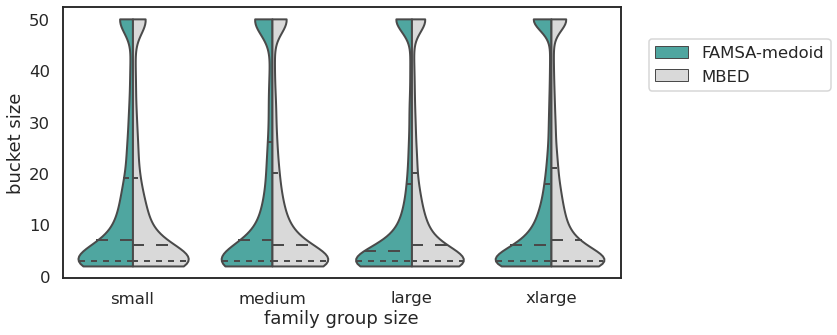

In [260]:
sns.set_context("talk")

plt.figure(figsize=(10,5))
# Draw a nested boxplot to show bills by day and time
ax = sns.violinplot( x="size_group", y="buckets",hue = "tree_method", dodge = False,cut=0,
            data=regressive_buckets_extended, orient = "v", split=True, inner="quart", \
            order=[ "small", "medium", "large", "xlarge"], \
            linewidth=2, palette={"FAMSA-medoid": "#40B5AD", "MBED": ".85"})
plt.legend(bbox_to_anchor=(1.05, 0.88),  loc = 2, borderaxespad=0.);
ax.set(xlabel="family group size", ylabel = "bucket size")

# Compare progressive and regressive performances 

In [179]:
reg_medoid = regressive[regressive.tree_method == "FAMSA-medoid"]
reg_mbed = regressive[regressive.tree_method == "MBED"]
prog_medoid = progressive[progressive.tree_method == "FAMSA-medoid"]
prog_mbed = progressive[progressive.tree_method == "MBED"]

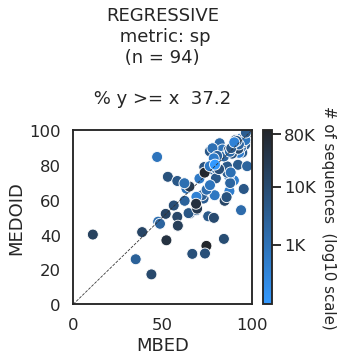

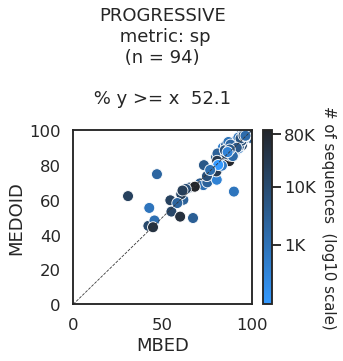

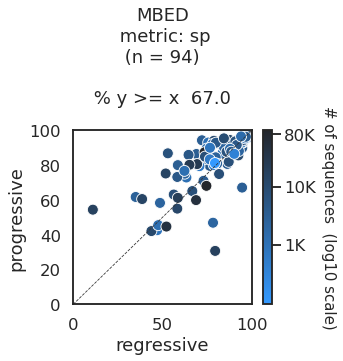

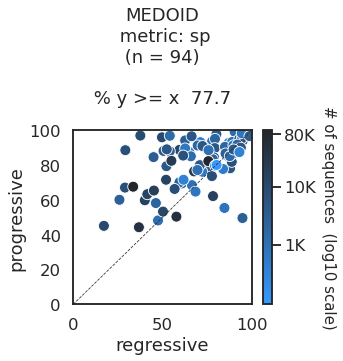

In [180]:
plot_scatter_perc(reg_mbed, reg_medoid,'MBED', 'MEDOID', title = "REGRESSIVE", metric = "sp", size_fig = 0.5)
plot_scatter_perc(prog_mbed, prog_medoid,'MBED', 'MEDOID', title = "PROGRESSIVE", metric = "sp", size_fig = 0.5)
plot_scatter_perc(reg_mbed, prog_mbed,'regressive', 'progressive', title = "MBED", metric = "sp", size_fig = 0.5)
plot_scatter_perc(reg_medoid, prog_medoid,'regressive', 'progressive', title = "MEDOID", metric = "sp", size_fig = 0.5)


# Correlation --> how much it influences the difference? 

[Text(0.5, 0, 'total number of buckets')]

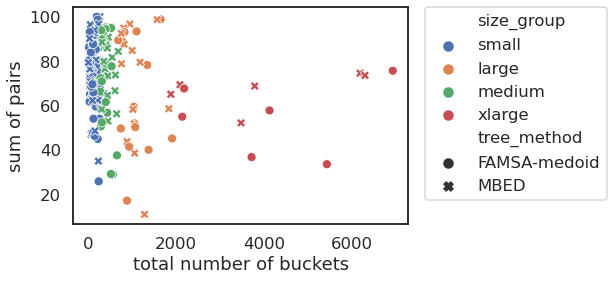

In [201]:

ax = sns.scatterplot(data=regressive, y="sp", x="tot", hue="size_group", style="tree_method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel="sum of pairs")
ax.set(xlabel="total number of buckets")

[Text(0.5, 0, 'mean bucket size')]

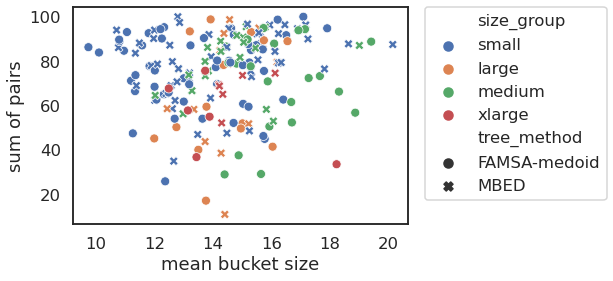

In [206]:
ax = sns.scatterplot(data=regressive, y="sp", x="mean_buckets", hue="size_group", style="tree_method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel="sum of pairs")
ax.set(xlabel="mean bucket size")

In [197]:
print(spearmanr(regressive_mbed.tot, regressive_mbed.sp))
print(spearmanr(regressive_mbed.mean_buckets, regressive_mbed.sp))

SpearmanrResult(correlation=-0.22405334918455083, pvalue=0.029939318069200038)
SpearmanrResult(correlation=0.3104750002544016, pvalue=0.00232271029014428)


In [198]:
print(spearmanr(regressive_medoid.tot, regressive_medoid.sp))
print(spearmanr(regressive_medoid.mean_buckets, regressive_medoid.sp))

SpearmanrResult(correlation=-0.2816805751310834, pvalue=0.005952621762026818)
SpearmanrResult(correlation=0.032815548023240486, pvalue=0.7535315380182057)
